# 'your_off-facebook_activity" Report
### EMAT 22110 - Data in Emerging Media and Technology
#### Author: Ethan M. Hancock
#### Created : 03.02.21

### Purpose
Facebook tailors the ads you see based off the interests they perceive to investigated this I an using the account data that Facebook provides to compare the data they've collected about my off Facebook activity and the list of advertisers who target my account. I hypothesize that the websites and apps I have interacted with off Facebook will be use that data for advertisements on my Facebook feed. 

In [237]:
import json
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
import pandas as pd

In [238]:
with open("/Volumes/Drive2/EMAT22110_Notebooks/InClass/facebook-ethanhancock94/ads_and_businesses/your_off-facebook_activity.json") as f :
    off = json.load(f)
off.keys()

dict_keys(['off_facebook_activity'])

In [239]:
with open("/Volumes/Drive2/EMAT22110_Notebooks/InClass/facebook-ethanhancock94/ads_and_businesses/advertisers_who_uploaded_a_contact_list_with_your_information.json") as t :
    adv = json.load(t)
adv.keys()

dict_keys(['custom_audiences'])

### Data
"off" is the json file containing the off Facebook activity that Facebook has recorded. This is a list of dictionaries for each website or app that I have interacted with off Facebook. Each dictionary has the name of the app or website and a list of each interaction event that occurred. Each event contains the event id, the type of even, and a timestamp. I also an using the 'advertisers_who_uploaded_a_contact_list_with_your_information.json' file to determine which apps or websites that I visited off Facebook are also advertising using my information. 

This is an explanation by Facebook of what your off Facebook activity is: https://www.facebook.com/help/2207256696182627
This is an article on LifeHacker.com that explains more about the advertisers_who_uploaded_a_contact_list_with_your_information.json: https://lifehacker.com/how-to-see-which-facebook-advertisers-have-your-info-1830211334

In [240]:
type(off['off_facebook_activity'])

list

In [241]:
off['off_facebook_activity'][0]

{'name': 'zdnet.com',
 'events': [{'id': 309391486091569,
   'type': 'PAGE_VIEW',
   'timestamp': 1611560100},
  {'id': 309391486091569, 'type': 'PAGE_VIEW', 'timestamp': 1611332820},
  {'id': 309391486091569, 'type': 'PAGE_VIEW', 'timestamp': 1603911900},
  {'id': 309391486091569, 'type': 'VIEW_CONTENT', 'timestamp': 1579663800}]}

In [242]:
off['off_facebook_activity'][0].keys()

dict_keys(['name', 'events'])

In [243]:
off['off_facebook_activity'][0]['events'][0]['type']

'PAGE_VIEW'

In [244]:
type(off['off_facebook_activity'][0]['events'])

list

### Data Preparation

In [245]:
apps_requests = [x['name'] for x in off['off_facebook_activity']]
all_event_count = [len(x['events']) for x in off['off_facebook_activity']]
activation_count = [len([x for x in j['events'] if x['type'] == 'ACTIVATE_APP']) for j in off['off_facebook_activity']]
custom_count = [len([x for x in j['events'] if x['type'] == 'CUSTOM']) for j in off['off_facebook_activity']]
search_count = [len([x for x in j['events'] if x['type'] == 'SEARCH']) for j in off['off_facebook_activity']]
view_content_count = [len([x for x in j['events'] if x['type'] == 'VIEW_CONTENT']) for j in off['off_facebook_activity']]
ad_request_count = [len([x for x in j['events'] if x['type'] == 'AD_REQUEST']) for j in off['off_facebook_activity']]
page_view_count = [len([x for x in j['events'] if x['type'] == 'PAGE_VIEW']) for j in off['off_facebook_activity']]

In the cell above I have taken the "your_off_facebook_activity.json" and turned each of the components in to lists to display in a Dataframe.

In [246]:
advertisers = [x for x in adv['custom_audiences']]
advertisers

['1-800 CONTACTS',
 '13th Floor Homes: Hidden Trails',
 '1st Choice Auto Centers',
 '25 Park Row - City Hall Park',
 '360 Physical Medicine',
 '4 Rivers Smokehouse',
 '4salearizona at My Home Group',
 'A Beautiful Mess',
 'A Whimsy Wonderland',
 'A&L BMW of Monroeville',
 'A-free',
 'Aaron Bagsby - Real Estate Broker - KW Realty',
 'Aaron Rodgers',
 'AARP',
 'AARP Foundation',
 'AbdTech',
 'Abilene Used Car Sales',
 'Abundant Health Chiropractic',
 'Acadiana Dodge Chrysler Jeep Ram Fiat',
 'Achieve TMS Centers',
 'ACME Markets',
 'Action Nissan',
 'Acton Chrysler Dodge Jeep Ram',
 'Acura',
 'Acura of Fremont',
 'Acura of Melbourne',
 'Acura of Rochester',
 'Acura of Westchester',
 'Addys Harbor Dodge',
 'adidas',
 'Adored by Alex',
 'Adult Swim',
 'Advantage Chevrolet of Bolingbrook',
 'Adwerx',
 'Aerie',
 'AgCarolina Farm Credit',
 'Air Hog y Aires Acondicionado En Pagos',
 'Air Wick',
 'Airbnb',
 'Airpark Dodge Chrysler Jeep',
 'Akins Ford Chrysler Dodge Jeep Ram',
 'Al Hendrickson T

In the cell above I turn the "advertisers_who_uploaded_a_contact_list_with_your_information.json" into a list to prepare it to compare to the list of apps and sites I interacted with off Facebook.

In [247]:
is_present = []
for i in off['off_facebook_activity']:
    if i['name'] in advertisers:
        is_present.append('yes')
    else:
        is_present.append('no')

Above I went through the list of apps from the off Facebook data and compared it to the advertisers list and if an app was present on the advertisers list then I assigned a yes value to the list if not it was assigned a no value. This way when the dataframe is displayed you can easily tell if the app is an advertiser.

In [248]:
appbyevent = pd.DataFrame(columns = ('App', 'Event Count', 'Activate App', 'Custom', 'Search', 'View Content', 'Ad Request', 'Page Views'))
appbyevent['App'] = apps_requests
appbyevent['Event Count'] = all_event_count
appbyevent['Activate App'] = activation_count
appbyevent['Custom'] = custom_count
appbyevent['Search'] = search_count
appbyevent['View Content'] = view_content_count
appbyevent['Ad Request'] = ad_request_count
appbyevent['Page Views'] = page_view_count
appbyevent['Is Advertiser'] = is_present
appbyevent

,App,Event Count,Activate App,Custom,Search,View Content,Ad Request,Page Views,Is Advertiser
0,zdnet.com,4,0,0,0,1,0,3,no
1,theknot.com,7,0,1,0,5,0,1,no
2,Peacock TV,2072,0,2072,0,0,0,0,yes
3,awelshop.com,1,0,0,0,1,0,0,no
4,Spark SMG,95,0,0,0,0,0,0,no
...,...,...,...,...,...,...,...,...,...
1897,accesso.com,1,0,0,0,1,0,0,no
1898,potomacriverboatco.com,2,0,0,0,2,0,0,no
1899,sugarcrm.com,2,0,0,0,2,0,0,no
1900,smallbizcrm.com,2,0,0,0,1,0,0,no


This dataframe displays all of the information that I have collected for this analysis with the relationships that are important to my analysis.

In [249]:
are_advertisers = appbyevent.groupby('Is Advertiser').count()
are_advertisers.drop(['Event Count', 'Activate App', 'Custom', 'Search', 'View Content', 'Ad Request', 'Page Views'], axis = 1, inplace = True)
are_advertisers

,App
Is Advertiser,
no,1875
yes,27


After creating the dataframe with all the values I parsed is down to just the count of apps that are advertisers and apps that are not so that I could make the data visualizations for that data to prove my hypothesis. 

In [250]:
yes_df = appbyevent[appbyevent['Is Advertiser'] == 'yes'].sort_values('Event Count', ascending = False)
yes_df

,App,Event Count,Activate App,Custom,Search,View Content,Ad Request,Page Views,Is Advertiser
2,Peacock TV,2072,0,2072,0,0,0,0,yes
5,HBO Max,61,0,61,0,0,0,0,yes
440,Best Buy,55,0,0,0,36,0,19,yes
6,Peacock TV,49,13,36,0,0,0,0,yes
85,Hulu,14,0,13,0,1,0,0,yes
462,Codecademy,13,0,13,0,0,0,0,yes
1546,Toyota USA,8,0,0,0,8,0,0,yes
385,USAA,8,0,0,0,5,0,3,yes
1170,GM Financial,7,0,7,0,0,0,0,yes
613,The Home Depot,7,0,1,0,5,0,1,yes


This dataframe displays all of the apps and websites that are advertisers so that I can gain insight in what companies are using my data and advertising. 

In [251]:
no_df = appbyevent[appbyevent['Is Advertiser'] == 'no'].sort_values('Event Count', ascending = False)
no_df

,App,Event Count,Activate App,Custom,Search,View Content,Ad Request,Page Views,Is Advertiser
788,Tumblr,312,0,312,0,0,0,0,no
379,rit.edu,209,0,0,0,190,0,19,no
60,kent.edu,131,0,0,0,93,0,38,no
783,Life360: Find Family & Friends,95,0,95,0,0,0,0,no
4,Spark SMG,95,0,0,0,0,0,0,no
...,...,...,...,...,...,...,...,...,...
1316,sucuri.net,1,0,0,0,1,0,0,no
778,videoask.com,1,0,0,0,0,0,1,no
780,khanacademy.org,1,0,0,0,0,0,1,no
1320,Royal Caribbean Cruises Ltd,1,0,0,0,1,0,0,no


This dataframe displays all of that apps and websites that I interacted with that do not advertise using my personal information. I used this list to compare the companies to the ones above in the yes list to form my conclusion. 

### Data Visualization

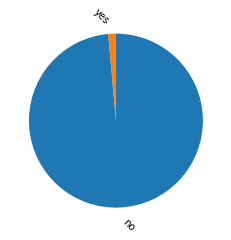

In [252]:
title = are_advertisers['App'].keys()
pieplot = plt.pie(x=are_advertisers['App'],
                 labels = title, startangle = 90,
                 counterclock = False, labeldistance = 1.2,
                 textprops = {'rotation': -45})

I choose to display the data in this fashion to give an easy visual representation of how many apps were also advertisers.

Text(0.5, 0, 'Are they an Advertiser?')

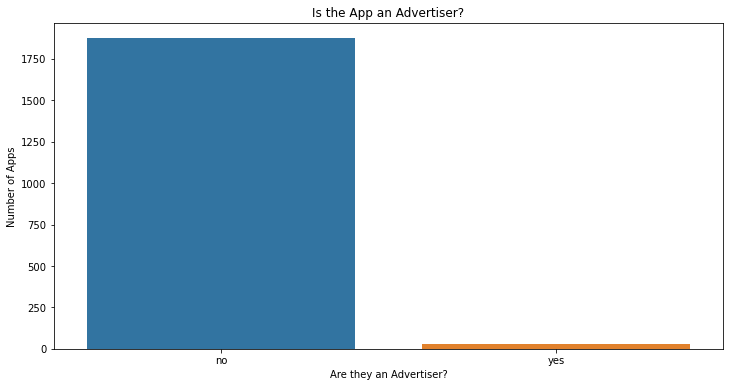

In [253]:
fig, ax = plt.subplots(figsize = (12,6))
barplot = sns.barplot(x=are_advertisers['App'].keys(), y = are_advertisers['App'],  
            data = are_advertisers, 
            label="Is the App an Advertiser", 
            ax=ax, ci=None)
ax.set_title("Is the App an Advertiser?")
ax.set_ylabel("Number of Apps")
ax.set_xlabel("Are they an Advertiser?")

Here I am showing a similar visual as above but it gives a better indication as to the size difference of the two categories' values. 

### Conclusion

After the analysis of the data I found that only 27 out of the 1,902 apps that had been reported as off Facebook activity were also advertisers with my information. This shows that I was wrong in my hypothesis and that the apps or sites I visited did not use that data to advertise on my Facebook feed. This is an interesting result because whether or not the would actually advertise they could use my information to avoid advertising on my Facebook if they felt I had already become a customer and no longer need to be advertised too. Of the 27 that do have my information for advertising purposes on Facebook are companies that would need to continually interact with their customers to retain their continued business. So, it makes logical sense that they would be advertisers. However, the remaining apps and sites that I interacted with off Facebook are also mostly companies that would benefit from continued advertising at times, so it seems that there is no solid correlation between interacting with a site off Facebook and that company uploading you contact info to Facebook for advertising purposes. 

#### Limitations

I believe that a better analysis of this hypothesis could be conducted if Facebook provided specific data on the advertisements that have been displayed on the feed or a list of the specific advertisers that target you and not just advertisers that have uploaded your contact information. 

#### Next Steps
I this that a further analysis involving the ads_interests list could shed more light on if the websites and apps you visited had an effect on the advertising you see. Unfortunately, due to time constraints and the amount of ads_interests data I did not have time to explore this avenue. 